# Dominio de la frecuencia II

Continuamos en esta pr√°ctica trabajando en el dominio de la frecuencias de las se√±ales

## Se√±ales continuas
### Transformada de Fourier

La mayor parte de las se√±ales de inter√©s pueden descomponerse en una suma de componentes sinusoidales. 


Tal y como vimos en la pr√°ctica anterior,  para se√±ales per√≠odicas esta descomposici√≥n se denomina serie de Fourier, mientras que para **se√±ales aperi√≥dicas (se√±ales de energ√≠a) esta descomposici√≥n se denomina  Transformada de Fourier**.



A nivel pr√°ctico, el an√°lisis en frecuencia para se√±ales en el dominio del tiempo  se realiza empleando un procesador digital de se√±ales, que puede ser una computadora digital de prop√≥sito general o sobre un hardware especialmente dise√±ado. Esto tiene gran importancia porque requiere de una representaci√≥n apropiada tanto para la entrada de datos  como para la salida, es decir, tratar con secuencias continuas (a la entrada o a la salida) no es lo m√°s adecuado computacionalmente.

Las librer√≠as de matem√°tica simb√≥lica como, por ejemplo,  [Sympy](https://www.sympy.org/), son una buena aproximaci√≥n para lidiar con las transformadas en tiempo continuo.


Recordamos brevemente las ecuaciones vistas en la teor√≠a para desarrollar la transformada de Fourier

#### Ecuaci√≥n de an√°lisis - Transformada directa

Esta ecuaci√≥n nos permite obtener la transformada de Fourier dada una se√±al aperi√≥dica en tiempo continuo


$\large X(F)=\int\limits_{-\infty}^{\infty} x(t)e^{-j2\pi Ft}dt $


Fijaos que  $X(F)$ es una funci√≥n de variable continua $F$ que no depende del per√≠odo o la frecuencia fundamental  (la se√±al es aperi√≥dica)


#### Ecuaci√≥n de s√≠ntesis - Transformada inversa

Esta ecuaci√≥n nos permite reconstruir una se√±al en base a su transformada de Fourier, es decir, es la representaci√≥n de la se√±al en el dominio de la frecuencia

$\large  x(t)=\int\limits_{-\infty}^{\infty} X(F)e^{j2\pi Ft}dF$


Fijaos que en este caso se integra sobre $F$.



#### Transformada de Fourier y Sympy

Sympy tiene una funci√≥n para desarrollar la transformada de Fourier [fourier_transform](https://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=fourier#sympy.integrals.transforms.fourier_transform)

Su estructura b√°sica es: 

```Python
import sympy as sp

sp.fourier_transform(f, x, k)
```
 
 * **f**: representa la se√±al en el dominio del tiempo
 * **x**: representa la variable simb√≥lica de la que depende la se√±al de entrada como, por ejemplo, el tiempo *t*
 * **k**: Es la frecuencia que vamos a analizar. Es nuestra variable continua *F* en las ecuaciones mostradas anteriormente. Lo podemos dejar como una variable simb√≥lica a la que le damos valor al *plotear*
 
**Nota**: uso los nombres de variables que usa Sympy en su API (para que pod√°is buscar/interpretar en su documentaci√≥n), aunque a veces no coincida con el s√≠mbolo usado en nuestra teor√≠a
 
#### Ejemplo de uso
Vamos a ver un ejemplo sencillo para ver como utilizar la funci√≥n. Queremos obtener la **transformada de Fourier de una impulso rectangular entre $\frac{-\pi}{2}$ y $\frac{\pi}{2}$** con la forma mostrada a continuaci√≥n 





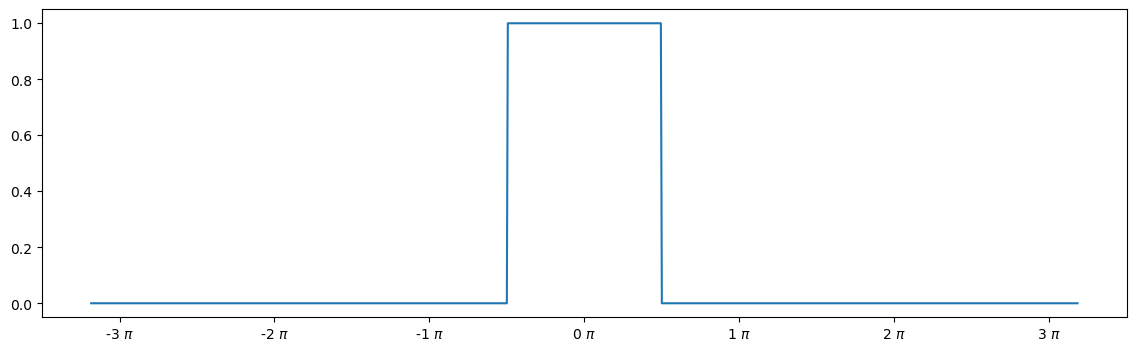

In [1]:
#Esta celda genera una impulso rectangular continuo en el dominio el tiempo
#Obviamente no podemos hacer algo continuo de verdad
#por lo que generamos una se√±al discreta que simula ser continua
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)
def create_signal(muestras):
    return [1 if -np.pi/2<i<np.pi/2 else 0 for i in muestras]

#La funci√≥n linspace divide un rango (ej. -10, 10) en 'n' trozos (ej.1000) equiespaciados
#muy √∫til para simular un continuo
muestras=np.linspace(-10,10, 1000)
f,ax=plt.subplots()#Lo creo as√≠ para tener acceso a los ejes (ax)

#cambio el eje de las x para que vaya en funci√≥n de m√∫ltiplos de pi
ax.plot(muestras/np.pi, create_signal(muestras))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

Importamos las dependencias necesarias de Sympy y creamos el impulso rectangular a trav√©s de Sympy


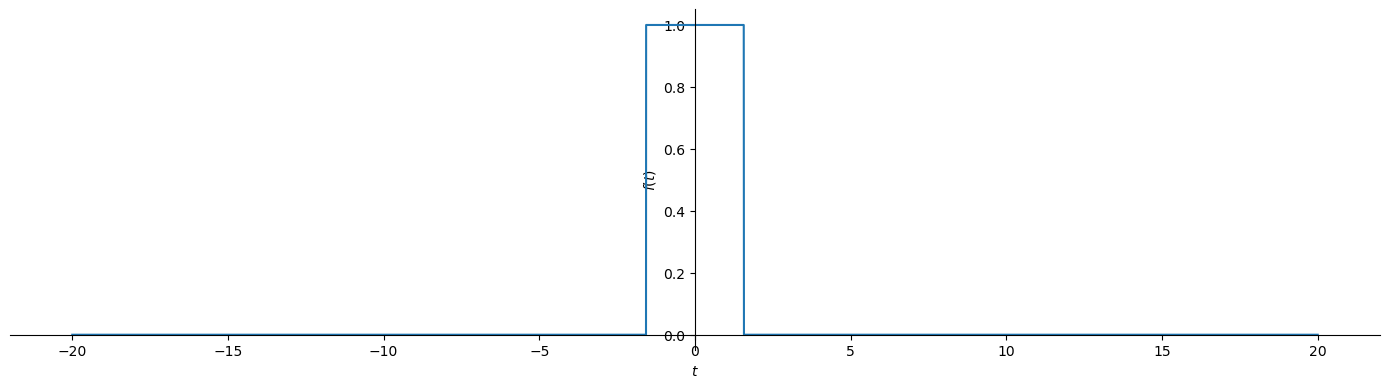

In [2]:
import sympy as sp
import matplotlib
from sympy.abc import  t
from IPython.display import display

sp.init_printing()#Selecciona el mejor modo de impresi√≥n para sympy de los disponibles

#IMPORTANTE la siguiente sentencia es necesaria para poder resolver la integral con Sympy,
# ya que si la F cuadra en el denominador, sympy no resuelve la integral y la deja 
# en la forma original por la posibilidad de que F=0 y cause una indeterminada.
#Esto pasa, por ejemplo, en los ejemplos en los que al resolver la integral tenemos un sinc
#, ya que sinc tiene una singularidad en 0
F = sp.symbols('F', nonzero=True)


#Creamos el impulso rect√°ngulo
#Solo tenemos 2 opciones por lo que lo resolvemos con Piecewise 
#con formato IF-ELSE
def f(t):
    return sp.Piecewise((1, sp.Abs(t)<=sp.pi/2),(0,True))

#Visualizamos la se√±al en un rango concreto de t
#Esta es la se√±al creada por nosotros pero NO es la transformada
sp.plot(f(t), (t, -20, 20))


Empleamos la funci√≥n de Sympy para el c√°lculo de la transformada pasando como argumentos la funci√≥n, la variable simb√≥lica de la que depende la funci√≥n y una variable simb√≥lica para representar la frecuencia

In [3]:
ft=sp.fourier_transform(f(t),t,F)
display(ft)
#En este caso no vemos la diferencia pero "simplify()" nos simplifica, si es posible el resultado
#A veces para repetir lo que vemos en la teor√≠a necesitamos hacerlo
display(ft.simplify())

Por √∫ltimo podemos visualizar el espectro de frecuencia. Esta se√±al ya la conocemos de la teor√≠a y sabemos que se puede simplificar en una seno cardinal *sinc* y vamos a comprobar que se visualiza como tal:

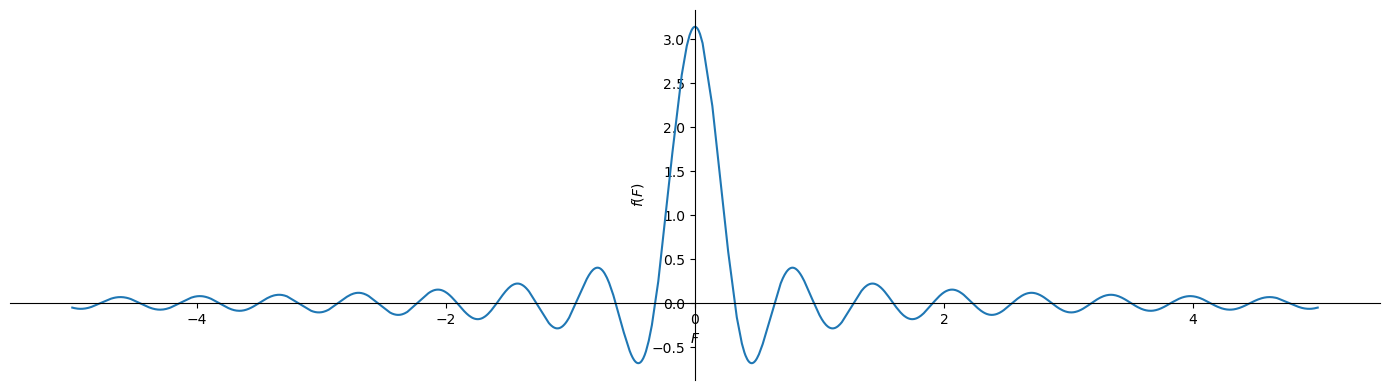

In [4]:
#Damos un rango de F para visualizar
sp.plot(ft, (F, -5, 5))

#### Transformada inversa
Si tenemos la representaci√≥n en el dominio de la frecuencia, podemos aplicar la transformada inversa para recuperar la secuencia en el dominio del tiempo


$\large  x(t)=\int\limits_{-\infty}^{\infty} X(F)e^{j2\pi Ft}dF$

Para realizarlo con Sympy tenemos [inverse_fourier_transform](https://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=fourier#sympy.integrals.transforms.inverse_fourier_transform)

<code>
    inverse_fourier_transform(F, k, x, **hints)
 </code>
 
 
 * **$F$** representa la transforamda de Fourier
 * **k**:  es la variable de frecuencia que hemos empleado para calcular la transformada. En el ejemplo y en la teor√≠a la representamos con F
 * **x**: representa la muestra temporal. En nuestro ejemplo estamos usando *t* 
 
**Nota**: las variables tienen los nombres que aparecen en el API de Sympy

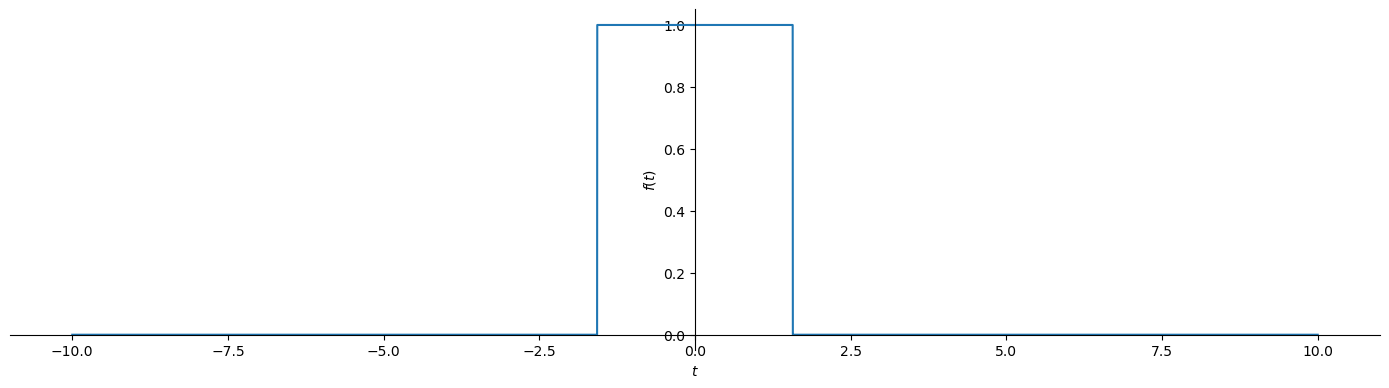

In [5]:
ft_inv=sp.inverse_fourier_transform(ft, F, t)
sp.plot(ft_inv,(t,-10,10))

#### Ejemplo de la se√±al rectangular m√°s gen√©rica

En las clases de teor√≠a a veces encontramos la se√±al en el dominio del tiempo en base a valores abstractos. Podemos trabajar con ellos y tambi√©n podemos darle valores a las variables para poder visualizar casos concretos y dejando solo una "libre" que var√≠e en el plot (ej. tiempo):  

‚éß             œÑ
‚é™A  for ‚îÇt‚îÇ ‚â§ ‚îÄ
‚é®             2
‚é™              
‚é©0   otherwise 

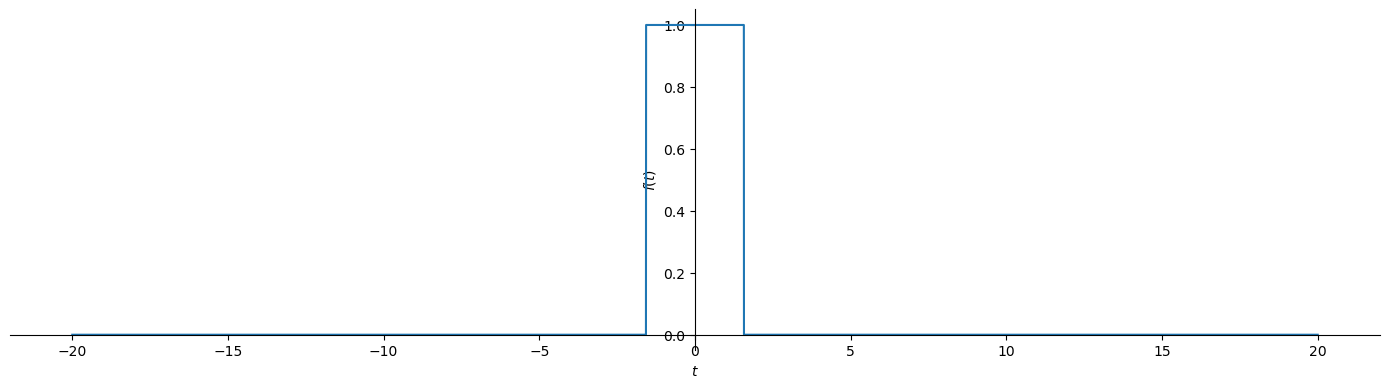

In [6]:
#Ejemplo visto en la teor√≠a
#Creamos las variables simb√≥licas. Tenemos que darle "pistas" a sympy de como
#son esas variables para que luego pueda resolver las operaciones
#en Sympy podemos a√±adir "assumptions" a los s√≠mbolos
# https://docs.sympy.org/latest/modules/core.html#module-sympy.core.assumptions

tau, A=sp.symbols('tau, A', integer=True, positive=True )
def f2(t):
    return sp.Piecewise((A, sp.Abs(t)<=tau/2),(0,True))


display(f2(t))

#le podemos dar valores concretos a A y a tau para visualizar
sp.plot(f2(t).subs([(A,1), (tau, sp.pi)]),(t, -20, 20) )


In [7]:
#El resultado es similar al ejemplo anterior pero en este caso tenemos variables que tenemos que concretar
ft2=sp.fourier_transform(f2(t),t,F)
display(ft2)





Una vez obtenida la transformada podr√≠amos darle valores para poder visualizar el espectro de la misma forma que en el caso anterior

**Nota**: Se pueden substituir varias variables simult√°neamente con un array de tuplas
<code>
a.subs([(var1, value1),(var2, value2),...,(var:n, value_n)])
</code>



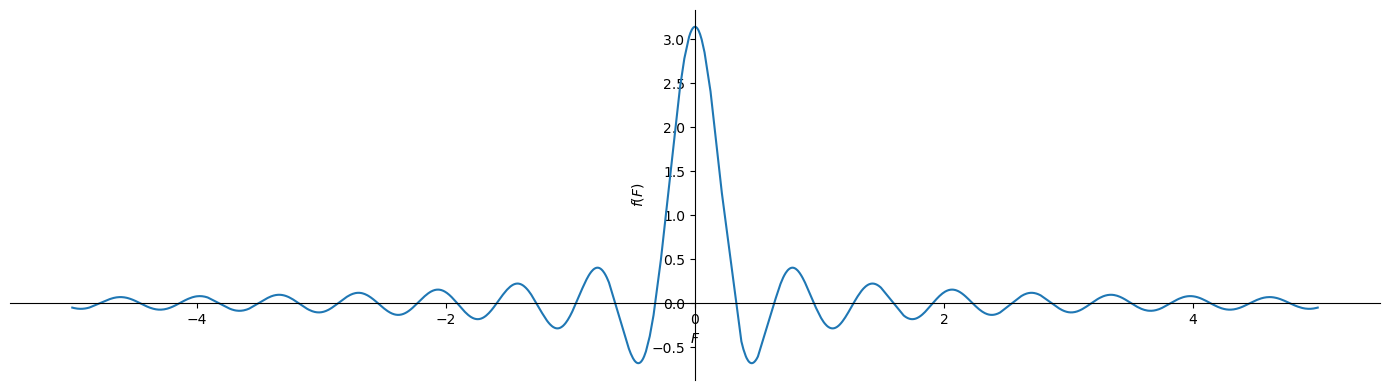

In [8]:
sp.plot(ft2.subs([(A,1),(tau,sp.pi)]), (F, -5, 5))


Fijaos que la amplitud m√°xima que coge es $A\tau$. En este caso $1\pi=3.14159...$



Es interesante ver el efecto de la transformada de Fourier de un impulso rectangular para diferentes valores de la anchura. 

Mayor ancho de impulso, m√°s concentrado el espectro

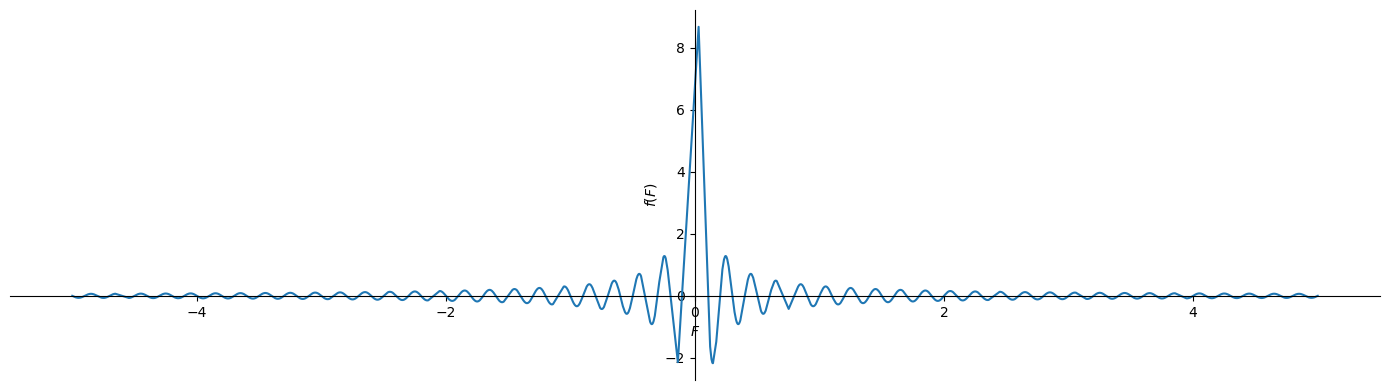

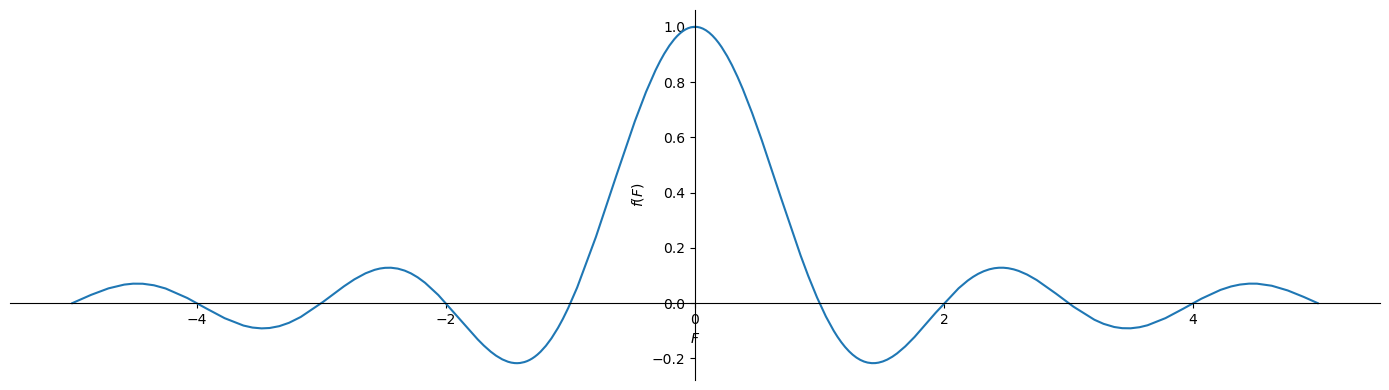

In [9]:
sp.plot(ft2.subs([(A,1),(tau,10)]), (F, -5, 5))
sp.plot(ft2.subs([(A,1),(tau,1)]), (F, -5, 5))

Podemos aplicar la transformada inversa para recuperar la secuencia en el dominio del tiempo:

$\large  x(t)=\int\limits_{-\infty}^{\infty} X(F)e^{j2\pi Ft}dF$



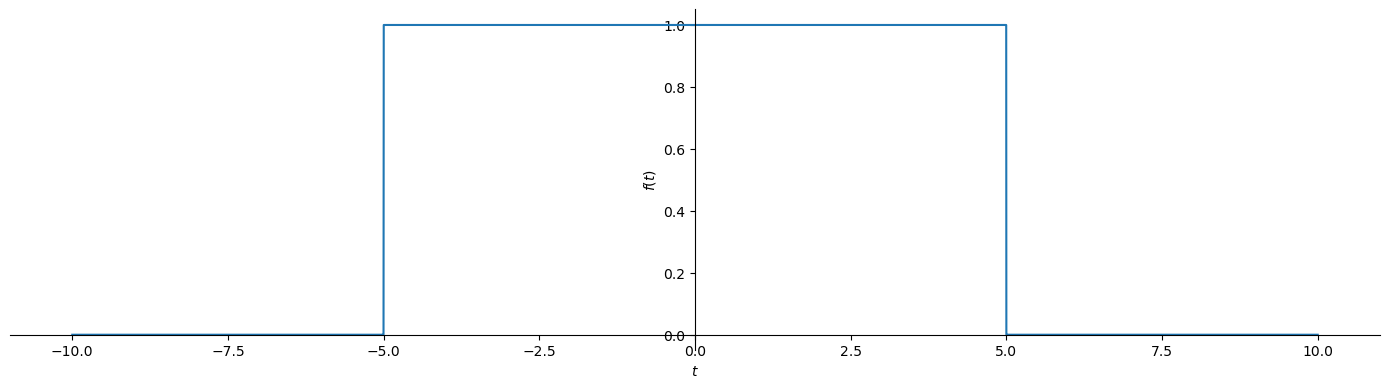

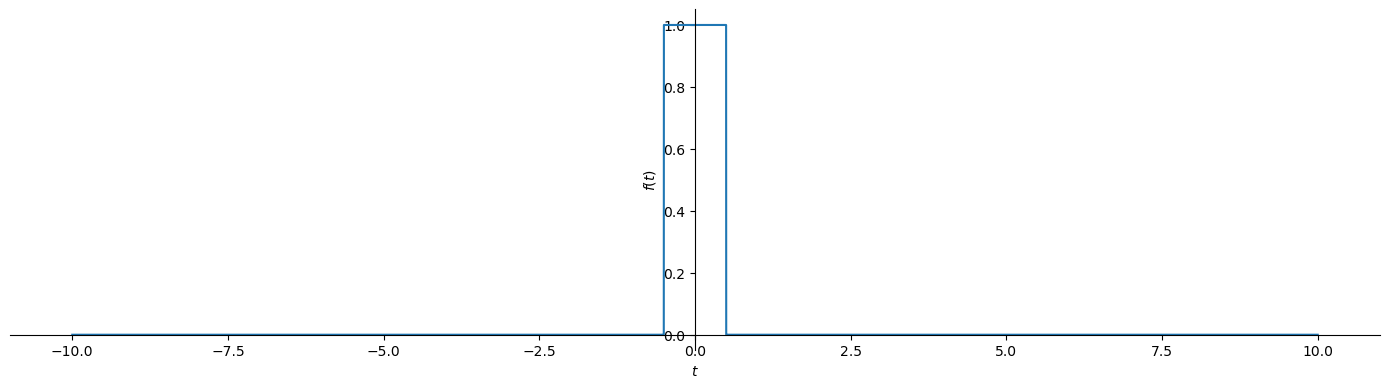

In [10]:


ft2_inv=sp.inverse_fourier_transform(ft2.subs([(A,1),(tau,10)]), F, t)
sp.plot(ft2_inv,(t,-10,10))

ft2_inv2=sp.inverse_fourier_transform(ft2.subs([(A,1),(tau,1)]), F, t)
sp.plot(ft2_inv2,(t,-10,10))

## Ejercicio

La relaci√≥n de Parseval para se√±ales aperi√≥dicas de energ√≠a finita expresa el principio de conservaci√≥n de la energ√≠a en los dominios del tiempo y de la frecuencia.


$E_x=\int\limits_{-\infty}^{\infty}|x(t)|^2 dt=\int\limits_{-\infty}^{\infty}|X(F)|^2 dF$


Calcula la energ√≠a para el impulso rect√°ngulo mostrado en el primer ejemplo:

* Desde el dominio del tiempo
* Desde el dominio de la frecuencia
* Compara que da el mismo valor


**Nota:** el s√≠mbolo de infinito en sympy es

<code>sp.oo</code>

Dos veces la letra 'o' en min√∫scula

**Nota 2:** Si implement√°is una funci√≥n que recibe los l√≠mites de la integral, dependiendo del problema, puede ser interesante restringir dichos l√≠mites y que no sea siempre $(-\infty,\infty)$, tal y como hacemos a mano (ej. es siempre 0 fuera de un intervalo concreto)

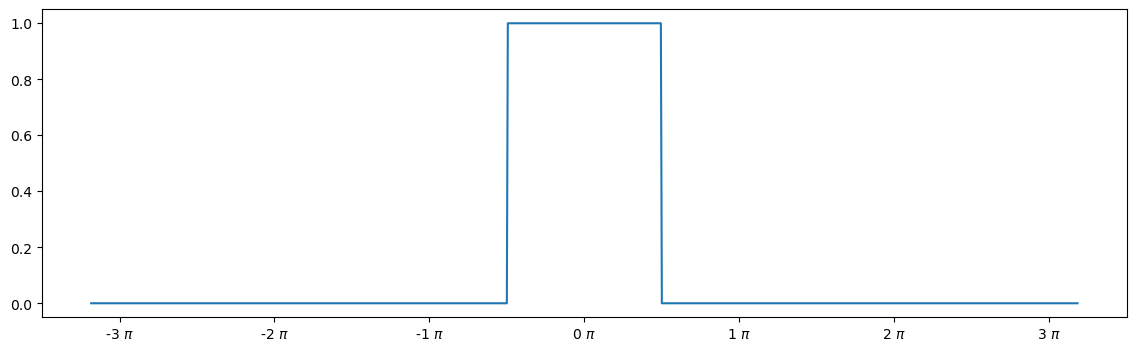

In [11]:
## RECORDATORIO Secuencia que representa el impulso rect√°ngulo
def create_signal(muestras):
    return [1 if -np.pi/2<i<np.pi/2 else 0 for i in muestras]

#La funci√≥n linspace divide un rango (ej. -10, 10) en 'n' trozos (ej.1000) equiespaciados
#muy √∫til para simular un continuo
muestras=np.linspace(-10,10, 1000)
f,ax=plt.subplots()#Lo creo as√≠ para tener acceso a los ejes (ax)

#cambio el eje de las x para que vaya en funci√≥n de m√∫ltiplos de pi
ax.plot(muestras/np.pi, create_signal(muestras))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

In [12]:
#Implementaci√≥n ejercicio


## Ejercicio

Calcula y visualiza (ej.entre -10, 10) el espectro de densidad de energ√≠a para el impulso escal√≥n

$S_{xx}=|X(F)|^2$

In [13]:
#Implementaci√≥n ejercicio


## Ejercicio

La integral del espectro de energ√≠a para todas las frecuencias nos proporciona la energ√≠a total de la se√±al (la hemos calculado antes). Si concretamos una banda de frecuencias podemos saber la energ√≠a de la se√±al en dicha banda.

La energ√≠a de la se√±al $x(t)$ en la banda de frecuencias $F_1<=F<=F_1+\Delta F$ es:

$\int\limits_{F_1}^{F_1+\Delta F}S_{xx}dF$


* Crea una  funci√≥n que permita obtener la energia de la se√±al en una banda concreta de frecuencias
    * Pod√©is probar con la banda $-\infty,0$  o con   $ 0, \infty $, ya que sab√©is que tiene que dar $\frac{\pi}{2}$

**Nota:** Si lo prob√°is en otro rango os aparecer√° una ecuaci√≥n que pod√©is resolver con:
```Python
sp.N(exp)
```
[sp.N()](https://docs.sympy.org/latest/modules/evalf.html) realiza una evaluaci√≥n aproximada para obtener un n√∫mero flotante





In [14]:
#Implementaci√≥n ejercicio

## Ejercicio

C√°lcula la transformada de Fourier para la siguiente se√±al (decaimiento exponencial por la derecha):

$\large x(t)= e^{-at}u(t), \color{red}{a>0}$


* Crea la funci√≥n que genera la se√±al.  La funci√≥n para crear la se√±al es una combinaci√≥n de 2 partes. 
    * Sympy tiene ya creada la funci√≥n escal√≥n ($u[n]$) [heaviside](https://docs.sympy.org/latest/modules/functions/special.html#heaviside)
    * Usa la funci√≥n escal√≥n de sympy como parte de la funci√≥n que genera la se√±al 
    * Crea el s√≠mbolo $a$ con las restricciones (*assumptions*) necesarias (entero positivo mayor que cero)

* Visualiza la se√±al en el intervalo (-20,20) dando un valor a $a$
* Crea el espectro de m√≥dulo de la se√±al ($|X(F)|$). Ten en cuenta el resultado de la transformada para crear la expresi√≥n que represente dicho espectro y que tendr√° como parte de esa expresi√≥n el s√≠mbolo $F$
    * visualiza el espectro de m√≥dulo en el intervalo (-4,4)
    * **Pista**: el resultado de la transformada contiene un complejo en forma bin√≥mica
* Crea el espectro de fase de la se√±al, $\Theta(ùêπ)$. Ten en cuenta el resultado de la transformada para crear la expresi√≥n que represente dicho espectro y que tendr√° como parte de esa expresi√≥n el s√≠mbolo ùêπ
    * visualiza el espectro de fase en el intervalo (-4,4)
    


**Nota**: La creaci√≥n de nuestra propia funci√≥n escal√≥n con *Piecewise* no parece funcionar en todas las versiones de Sympy generando una transformada de Fourier no resuelta en forma de Piecewise (con diferentes opciones dependiendo de $t$). 
**Importante**: Utiliza la funci√≥n que ya proporciona Sympy [heaviside](https://docs.sympy.org/latest/modules/functions/special.html#heaviside)

**Nota 2**: formulas necesarias

$z=a+bj$

$r=\sqrt{a^2 + b^2}$

$\theta= arctan(\frac{b}{a})$

$z=\frac{a+bj}{c+dj}, \theta(z)= arctan(\frac{b}{a})-arctan(\frac{d}{c})$


In [15]:
#Implementaci√≥n ejercicio
#Crea y visualiza la funci√≥n pedida


In [16]:
#Implementaci√≥n ejercicio
#Crea la transformada de Fourier para poder a continuaci√≥n calcular el espectro de m√≥dulo
#Si se visualiza la transformada ver√©is que ten√©is un cociente de complejos en forma bin√≥mica
#Pod√©is  calcular el m√≥dulo a trav√©s de las f√≥rmulas

In [17]:
#Implementaci√≥n ejercicio
#Crea la transformada de Fourier para poder a continuaci√≥n calcular el espectro de fase
#Si se visualiza la transformada ver√©is que ten√©is un cociente de complejos en forma bin√≥mica
#Pod√©is  calcular la fase a trav√©s de las f√≥rmulas

## Ejercicio

Repetir el ejercicio anterior para la se√±al (decaimiento exponencial por la izquierda):

$x(t)=e^{|a|t}u(-t), \color{red}{a>0}$

Pr√°cticamente se puede copiar todo el ejercicio anterior.

In [18]:
#Implementaci√≥n ejercicio



## Ejercicio

Calcular y visualizar la transformada de Fourier para la siguiente se√±al (decaimiento exponencial por los dos lados):

$x(t)=e^{-a|t|}, \color{red}{a>0}$


* Sumar las transformadas calculadas en los ejercicios anteriores (decaimiento exponencial por la izquierda y por la derecha). Si se simplifica (*sp.simplify()*) la suma se deber√≠a de obtener la misma expresi√≥n que para la transformada para la se√±al con decaimiento exponencial por los dos lados debido a la **propiedad de linealidad**


In [19]:
#Implementaci√≥n ejercicio

    